# Section 10 - Clustering Models: Spectral Embedding and Clustering

This section we're going to:

- Review lecture content on clustering methods;
- Better understand Spectral Embedding model;
- Hands on experience using this clustering method.

---

## 1 - Load data

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.07, random_state=0)
print(X.shape, y.shape)

(300, 2) (300,)


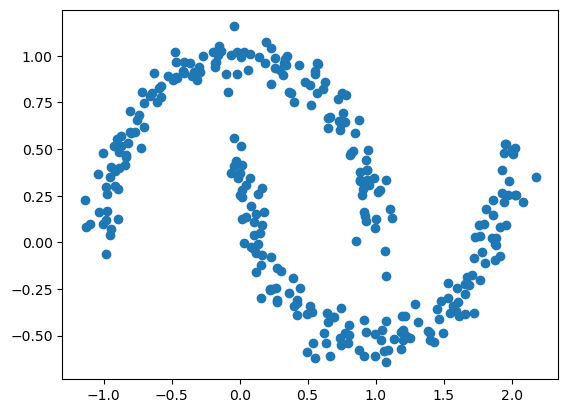

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## 2 - Recap

### 1a. Big Idea
- Spectral Embedding is a **<u>dimensionality reduction technique</u>** that lies within manifold learning methods. 
- The central idea for those methods is that, even though the data may be represented in a high-dimensional space, the important patterns/characteristics of the data is actually **inherently lower dimensional**.

### 1b. Similarity to PCA
- Like PCA, if we can **<u>"project" our data onto some appropriate low-dimensional space</u>** (and using <u>eigen-magic!</u>), then we can perform tasks like classification or clustering to this new (and hopefully simpler) representation of the data. 
- Unlike PCA, Spectral Embedding uses the <u>**graph/network of the data**</u>, instead of the covariance of the data. 

### 2a. Spectral Embedding Method
1. **Adjacency A.** Construct the graph adjacency matrix $A$, which has dimension $n$ by $n$, "number of data points" by "number of data points". 
    - Vertices are connected $A_{ij} = A_{ji} = 1$ if and only if data points are "close enough" $\|x_i-x_j\| < d_T$ some threshold distance.
2. **Degree D.** Compute graph degree matrix $D$, where diagonal entries are degree of each vertex. 
3. **Laplacian L.** Compute graph Laplacian $L=D-A$. 
4. **Eigendecomposition.** Perform an eigendecomposition $L = U \Lambda U^T$ to get the eigenvectors and eigenvalues, and study those objects to get a sense of the data in a new basis.

### 2b. Spectral Clustering Method
- After embedding, we can perform clustering on the eigenvectors using any of your favorite clustering technique. (manually thresholding, k-means, gmm, etc.)
- Like PCA, we can consider muliple eigenvectors ("multiple PCs") when performing our clustering.


## 3 - Spectral embedding
**Task:**
- complete the code below steps 1-4 of spectral embedding
- tweak the parameters where prompted to see how they affect the clustering assignment

#### Step 1: Adjacency

In [3]:
import numpy as np

# Compute the adjacency matrix
sqd_residual = (X[np.newaxis, :, :] - X[:, np.newaxis, :]) ** 2
dist = np.sqrt(sqd_residual.sum(axis=-1))

## Tweak the epsilon param between 0.1 to 1
## see how this affects clustering
## e.g. 0.1, 0.3, 0.6, 1
epsilon = 0.3
A = (dist < epsilon).astype(np.float32)
np.fill_diagonal(A, 0)

#### Step 2:  Degree

In [4]:
# Compute degree matrix
degree = np.sum(A, axis=1)
D = np.diag(degree)

#### Step 3:  Laplacian

In [5]:
# Compute the graph Laplacian
L = D - A

#### Step 4:  Eigendecomposition

In [6]:
# Eigendecomposition
w, v = np.linalg.eigh(L)

#### Visualize embedding

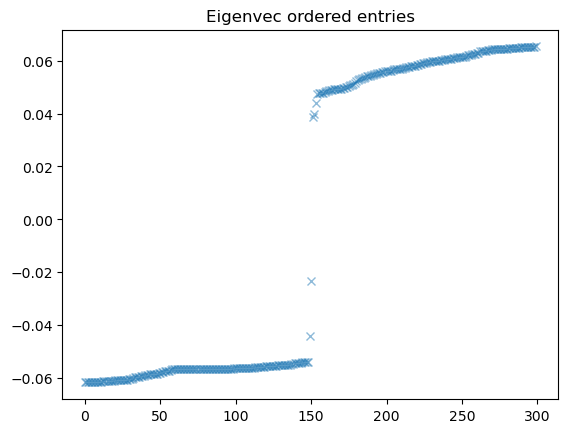

In [7]:
## Try using other evecs, such as 3rd and 4th lowest,
## to see how that affects the clustering assignment
evec_num = 2
evec = v[:,evec_num-1]
s = np.argsort(evec)

plt.plot(evec[s], 'x', alpha=0.5)
plt.title('Sorted eigenvector %d' % evec_num)
plt.show()

## Spectral Clustering
### Option 1: heuristic/round-off/manual on evec

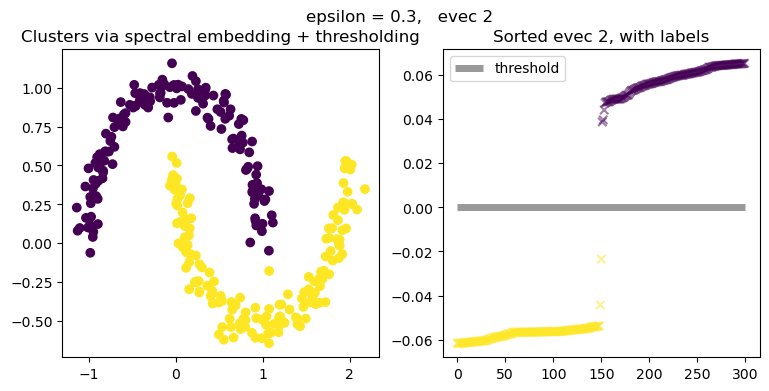

In [19]:
# Clustering data
label_a = (evec < 0).astype(int)

plt.figure(figsize=(9,4))
plt.suptitle('epsilon = %.1f,   evec %d' % (epsilon, evec_num))

plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=label_a)
plt.title("Clusters via spectral embedding + thresholding")

plt.subplot(122)
plt.scatter(np.arange(len(evec)), evec[s], marker='x', c=label_a[s], alpha=0.5)
plt.hlines(0,0,300,color='k',alpha=0.4,linewidth=5, label='threshold')
plt.title('Sorted evec %d, with labels' % evec_num)
plt.legend()

plt.show()

### Option 2: k-means, gmm, etc.

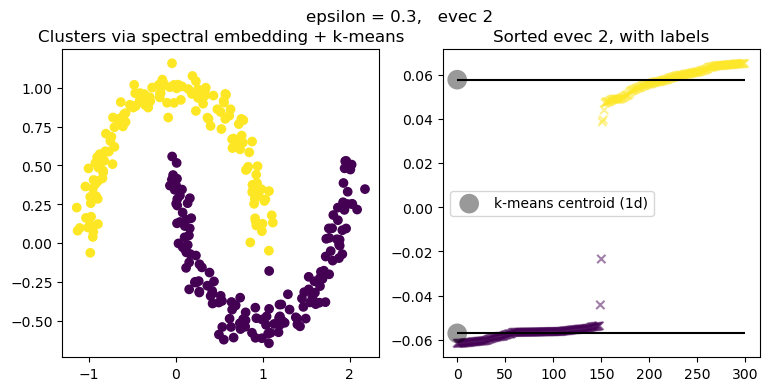

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=100, init='random')
kmeans.fit(evec.reshape(-1,1))
label_b = kmeans.labels_       # can negate with ~kmeans.labels_ for coloring purposes too.
centers = kmeans.cluster_centers_

plt.figure(figsize=(9,4))
plt.suptitle('epsilon = %.1f,   evec %d' % (epsilon, evec_num))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=label_b)
plt.title("Clusters via spectral embedding + k-means")

plt.subplot(122)
plt.scatter(np.arange(len(evec)), evec[s], marker='x', c=label_b[s], alpha=0.5)
plt.scatter([0,0],centers,c='k',s=200,alpha=0.4,edgecolor='none', label='k-means centroid (1d)')
plt.hlines(centers,0,300,color='k')
plt.title('Sorted evec %d, with labels' % evec_num)
plt.legend(loc='center left')

plt.show()

## 3 - K-Means
Compare spectral clustering against k-means.

One can notice that Spectral Clustering groups the datapoints better than K-Means, which was expected, given the shape of our data.

In [10]:
kmeans_model = KMeans(n_clusters=2, n_init=100, init='random').fit(X)
label_c = ~kmeans_model.labels_      # Try negating the labels: ~kmeans_model.labels_
C = kmeans_model.cluster_centers_

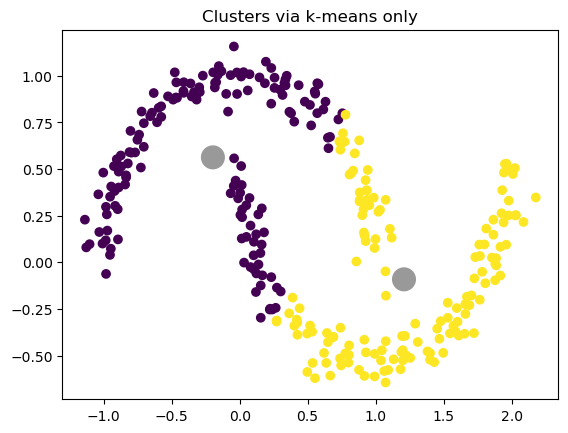

In [11]:
plt.scatter(X[:,0], X[:,1], c=label_c) 
plt.scatter(C[:,0],C[:,1],c='k',s=300,alpha=0.4,edgecolor='none')
plt.title("Clusters via k-means only")
plt.show()